<a href="https://colab.research.google.com/github/climate-and-health-datasci-Unicamp/ldl-cholesterol-climate-analysis/blob/master/notebooks/01_LDL_descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authors:**
* [Júlia Perassolli De Lázari](https://github.com/juliaplazari)
* [Thiago Ribas Bella](https://github.com/trbella)

*created in jun/2020*

# LDL descriptive

* INPUT: [df_clean.csv](https://drive.google.com/file/d/1m6f74PIj1oAZOYeLRHHvdbAqEB-Mt2-v/view?usp=sharing) - n = 1,038,281

This script contains:
- basic dispersion measures
- frequency of sexes
- frequency of age groups
- frequency of results, classified as desirable or high
- qq-plots
- boxplots

for the LDL dataframe. 




## Load the clean dataframe with LDL results



In [ ]:
#@title Libraries and data
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import pylab
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#-------------------------------------------------------------------#
#                      Load clean dataframe                         #
#-------------------------------------------------------------------#
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#id obtained from shareable link in gdrive file
googl = drive.CreateFile({'id':'1m6f74PIj1oAZOYeLRHHvdbAqEB-Mt2-v'})
googl.GetContentFile('df_clean.csv')

df_clean = pd.read_csv('/content/df_clean.csv')
print("Lenght of clean dataframe: ",len(df_clean))
df_clean = df_clean.drop(columns = ['Unnamed: 0','Year','Month','Day'])
df_clean = df_clean.rename(columns = {'DateTimeExam':'DATE'})
df_clean.sort_values(by = 'DATE').head(5)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Lenght of clean dataframe:  1038281


,Procedure,DATE,Parameter,Result,Sex,City,UF,Age
412,LDL,2008-03-03,LDLP,98.0,F,CAMPINAS,SAO PAULO,39
333,LDL,2008-03-03,LDLP,143.0,M,CAMPINAS,SAO PAULO,59
491,LDL,2008-03-03,LDLP,179.0,M,CAMPINAS,SAO PAULO,56
492,LDL,2008-03-03,LDLP,166.0,F,CAMPINAS,SAO PAULO,41
493,LDL,2008-03-03,LDLP,178.0,F,CAMPINAS,SAO PAULO,67


## Summary

Get the basic dispersion measures of LDL cholesterol: mean, standart deviation, min, 25%, 50% (median), 75%, max.




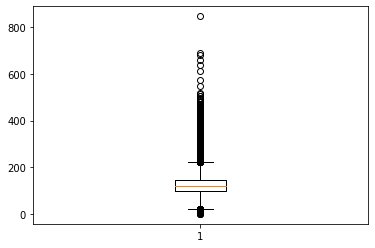

,Result
count,1038281.00
mean,124.23
std,38.27
min,1.00
25%,97.00
50%,121.00
75%,148.00
max,846.00


In [ ]:
#@title Basic dispersion measures
summary = pd.DataFrame(round(df_clean['Result'].describe(),2))
plt.boxplot(df_clean['Result'])
plt.show()
summary

**Conclusion:** We can observe several outliers in the dataset. Based on this we will remove extreme data, < 5º percentile and > 95º percentile, for statistical analysis.

## Frequency of sexes



In [ ]:
#@title Get the percentage of each sex. For this analysis, the rows with sex as 'I' were discarded.

#drop the rows with sex as 'I'
sex = df_clean[df_clean['Sex']!='I']
ni = len(df_clean[df_clean['Sex']=='I'])
npe = round(len(df_clean[df_clean['Sex']=='I'])/len(df_clean),2)
print(f"There're {ni}({npe}%) rows with sex as I")

#get the absolute value of sex as 'M' and 'F its percent
#   percent from the dataframe without the rows with sex as 'I
sex = pd.DataFrame(sex['Sex'].value_counts())
sex = sex.reset_index()
sex['Percent'] = sex['Sex']/sex['Sex'].sum()*100
sex['Percent'] = round(sex['Percent'],2)
sex = sex.rename(columns = {'Sex':'n','index':'Sex'})
sex

There're 10395(0.01%) rows with sex as I


,Sex,n,Percent
0,F,590757,57.47
1,M,437129,42.53


**Conclusion:** Women consult physicians more often than men.

## Frequency of age groups

Classify each row in a age group, creating a new column ('Age group'). The classifications are:

- **Infant:** less than 2 years old

- **Child:** between 2 and 12 years old

- **Teenager:** between 13 and 19 years old

- **Young adult:** between 20 and 39 years old

- **Adult:** between 40 and 64 years old

- **Elderly:** more than 64 years old

Get the percentage of each age group and a histogram plot.

In [ ]:
#@title Create age group category
df_clean.loc[df_clean['Age'] < 2.0, 'Age group'] = '1 - Infant'
df_clean.loc[(df_clean['Age'] >=2.0) & (df_clean['Age'] <= 12.0), 'Age group'] = '2 - Child'
df_clean.loc[(df_clean['Age'] >=13.0) & (df_clean['Age'] <= 19.0), 'Age group'] ='3 - Teenager'
df_clean.loc[(df_clean['Age'] >=20.0) & (df_clean['Age'] <= 39.0), 'Age group'] ='4 - Young adult'
df_clean.loc[(df_clean['Age'] >=40.0) & (df_clean['Age'] <= 64.0), 'Age group'] ='5 - Adult'
df_clean.loc[df_clean['Age'] >64.0, 'Age group'] = '6 - Elderly'

             index  Age group  Percent
5       1 - Infant        482     0.05
3        2 - Child      46078     4.44
4     3 - Teenager      45888     4.42
2  4 - Young adult     181974    17.53
0        5 - Adult     520128    50.10
1      6 - Elderly     243731    23.47


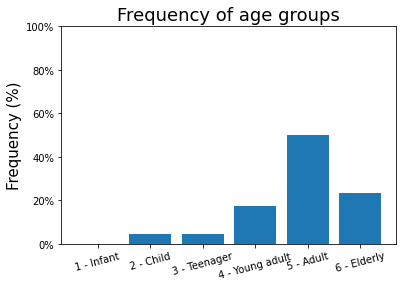

In [ ]:
#@title Plot age group frequency 
faixa = pd.DataFrame(df_clean['Age group'].value_counts())
faixa = faixa.reset_index()
faixa = faixa.sort_values(by=['index'])
faixa['Percent'] = faixa['Age group']/faixa['Age group'].sum()*100
faixa['Percent'] = round(faixa['Percent'],2)
print(faixa)

#plot
plt.bar(faixa['index'],faixa['Percent'])
plt.xlabel('')
plt.ylabel('Frequency (%)',fontsize = 15)
plt.ylim(0,100)
plt.title('Frequency of age groups',fontsize = 18)
#plt.text(-0.5,35,'Infant: <2 years old \nChild: 2 to 12 years old \nTeenager: 13 to 19 years \nYoung adult: 20 to 39 years old\nAdult: 40 to 64 years old\nElderly: >64 years old', fontsize = 12)
plt.xticks(rotation=15)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** Far more adults took cholesterol exam than other age groups. This high number could be explained by the wide age range (40-64) for this age group. However, this age categorization is widely used by the physicians.

## Exam results

Get the frequency of results in percentage and classify the values as desirable or high.

The reference values are from [Brazilian guideline on dyslipidemia](http://publicacoes.cardiol.br/2014/diretrizes/2017/02_DIRETRIZ_DE_DISLIPIDEMIAS.pdf) (pages 8 and 42):
- under 20 years old:  desirable values is less than 110 mg/dL.

- over 20 years old: desirable values is less than 130 mg/dL.


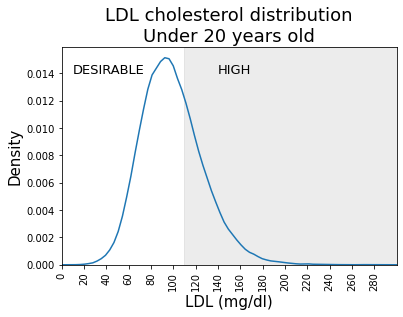

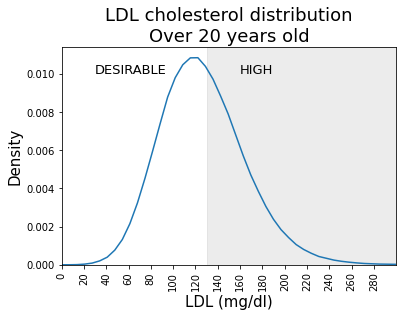

In [ ]:
#@title LDL cholesterol distribution
ref1 = 110
ref2 = 130

#Lower than 20 years old
lower_20 = df_clean[df_clean['Age'] <= 20]
bins = np.linspace(0, 300, 50)
sns.distplot(lower_20['Result'],bins=bins,hist=False)
plt.xlabel('LDL (mg/dl)',fontsize =15)
plt.ylabel('Density',fontsize =15)
plt.title('LDL cholesterol distribution\nUnder 20 years old',fontsize =18)
plt.text(ref1-100,0.014,'DESIRABLE',fontsize = 13) # text
plt.text(ref1+30,0.014,'HIGH',fontsize = 13)
plt.xlim(30,300)
x = pd.Series(range(0,300,1))
plt.xticks(x[::20],rotation=90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.axvspan(xmin=ref1, xmax=300,alpha = 0.15,color ='gray')
plt.show()

#Higher than 20 years old
higher_20 = df_clean[df_clean['Age'] >= 20]
sns.distplot(higher_20['Result'],bins=bins,hist=False)
plt.xlabel('LDL (mg/dl)',fontsize =15)
plt.ylabel('Density',fontsize =15)
plt.title('LDL cholesterol distribution\nOver 20 years old',fontsize =18)
plt.text(ref2-100,0.01,'DESIRABLE',fontsize = 13) # text
plt.text(ref2+30,0.01,'HIGH',fontsize = 13)
plt.xlim(30,300)
x = pd.Series(range(0,300,1))
plt.xticks(x[::20],rotation=90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.axvspan(xmin=ref2, xmax=300,alpha = 0.15,color ='gray')
plt.show()

**Conclusion:** It looks like, at least for the over 20 years group, that ldl cholesterol follows a normal distribution, with little less than half the population with high levels of this biomarker.

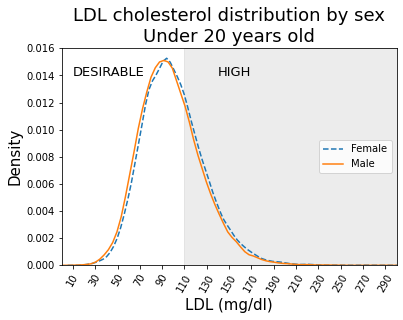

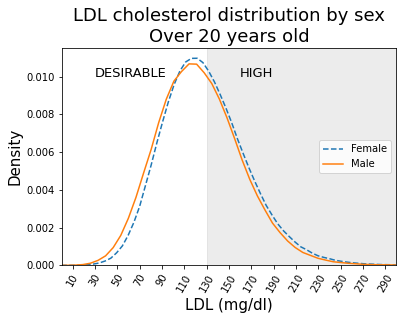

In [ ]:
#@title LDL cholesterol distribution by sex

#Lower than 20 years old
bins = np.linspace(0, 300, 50)
ax1 = sns.distplot(lower_20['Result'][lower_20['Sex']=="F"],hist=False,bins=bins, label='Female')
[line.set_linestyle("--") for line in ax1.lines]
ax2 = sns.distplot(lower_20['Result'][lower_20['Sex']=="M"],hist=False,bins=bins, label='Male')
plt.legend(loc = 'center right')
plt.xlabel('LDL (mg/dl)',fontsize =15)
plt.ylabel('Density',fontsize =15)
plt.title('LDL cholesterol distribution by sex\nUnder 20 years old',fontsize =18)
plt.text(ref1-100,0.014,'DESIRABLE',fontsize = 13) # text
plt.text(ref1+30,0.014,'HIGH',fontsize = 13)
plt.xlim(0,300)
x = pd.Series(range(10,300,1))
plt.xticks(x[::20],rotation=60)
plt.axvspan(xmin=ref1, xmax=300,alpha = 0.15,color ='gray')
plt.show()

#Lower than 20 years old
ax1 = sns.distplot(higher_20['Result'][higher_20['Sex']=="F"],hist=False,bins=bins, label='Female')
[line.set_linestyle("--") for line in ax1.lines]
ax2 = sns.distplot(higher_20['Result'][higher_20['Sex']=="M"],hist=False,bins=bins, label='Male')
plt.xlabel('LDL (mg/dl)',fontsize =15)
plt.ylabel('Density',fontsize =15)
plt.title('LDL cholesterol distribution by sex\nOver 20 years old',fontsize =18)
plt.text(ref2-100,0.01,'DESIRABLE',fontsize = 13) # text
plt.text(ref2+30,0.01,'HIGH',fontsize = 13)
plt.xlim(0,300)
plt.legend(loc = 'center right')
x = pd.Series(range(10,300,1))
plt.xticks(x[::20],rotation=60)
plt.axvspan(xmin=ref2, xmax=300,alpha = 0.15,color ='gray')
plt.show()

**Conclusion:** Both sexes distribution doesn't seem to have significative different levels of cholesterol.

## QQ-Plot for normality check

A Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

##### [QQ-Plot examples](http://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html) for interpretation.

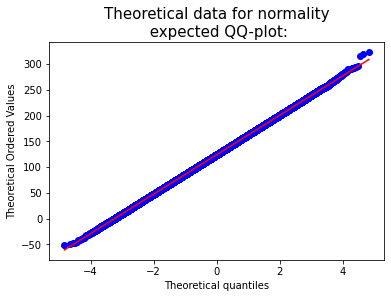

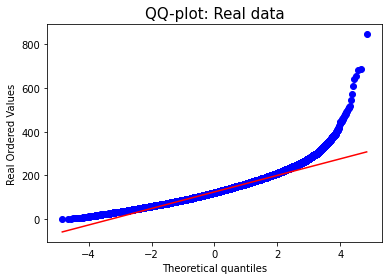

In [ ]:
#@title QQ-plots: Theoretical Normal vs Real Data 

#mean and std
loc, scale = scipy.stats.norm.fit(df_clean['Result'])
#print(loc,scale)

#generates a normal curve with mean and std obtained above
# how it would be a normal distribution with the parameters of the dataframe used
normal = scipy.stats.norm.rvs(loc=loc, scale=scale, size=(len(df_clean['Result']))) 

#qqplot theoretical normal 
scipy.stats.probplot(normal, dist="norm", plot=pylab)
pylab.title('Theoretical data for normality\n expected QQ-plot:',fontsize = 15)
plt.ylabel('Theoretical Ordered Values')
pylab.show()

#qqplot real data
scipy.stats.probplot(df_clean['Result'], dist="norm", plot=pylab)
pylab.title('QQ-plot: Real data',fontsize = 15)
plt.ylabel('Real Ordered Values')
pylab.show()

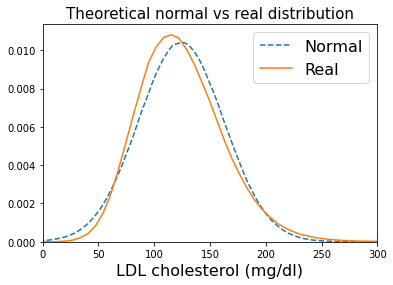

In [ ]:
#@title Distributions: Theoretical Normal vs Real Data
#plot the theoretical normal and the real data
ax1 = sns.distplot(normal,bins = bins,hist=False, label = 'Normal')
[line.set_linestyle("--") for line in ax1.lines]
ax2 = sns.distplot(df_clean['Result'],bins = bins,hist=False,label = 'Real')
plt.title('Theoretical normal vs real distribution', fontsize = 15)
plt.xlabel("LDL cholesterol (mg/dl)",fontsize = 16)
plt.xlim(0,300)
plt.legend(fontsize = 16)
plt.show()

**Conclusion:** Without stratification, the graphs show the data differs slightly from normality. Because of our large sample size (n = 1,038,281) the graph approach is better than conventional normality tests.

## Boxplots of LDL cholesterol distribution
Boxplot is a method for graphically depicting groups of numerical data through their quartiles.

The distribution of results per year and per age group was analysed using boxplots.


After removing the 5% and 95% extremes we have 88290 rows


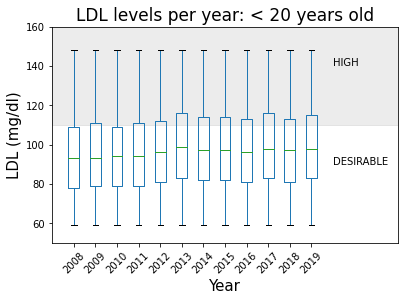

After removing the 5% and 95% extremes we have 854446 rows


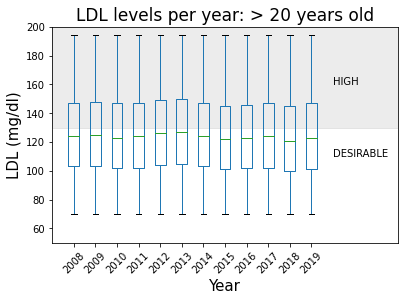

In [ ]:
#@title By Year
#-------------------------------------------------------------------#
#                     Boxplot of results per year                   #
#-------------------------------------------------------------------#
lower_20 = lower_20[(lower_20['Result']<=lower_20['Result'].quantile(.95))&(lower_20['Result']>=lower_20['Result'].quantile(.05))]
print("After removing the 5% and 95% extremes we have",len(lower_20),"rows")
lower_20['DATE'] = pd.to_datetime(lower_20['DATE'])
ax=lower_20.boxplot(by=lower_20['DATE'].dt.year,column=['Result'],rot=45,grid=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.axhspan(ymin=ref1, ymax=lower_20['Result'].max()+100,alpha = 0.15,color ='gray')
plt.xlim(0, 16)
plt.ylim(50, 160)
plt.text(13,ref1+30,'HIGH')
plt.text(13,ref1-20,'DESIRABLE')
plt.title("LDL levels per year: < 20 years old", fontsize = 17)
plt.suptitle("")
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("LDL (mg/dl)", fontsize = 15)
plt.show()


#remove data from extremes 5% and 95%
higher_20 = higher_20[(higher_20['Result']<=higher_20['Result'].quantile(.95))&(higher_20['Result']>=higher_20['Result'].quantile(.05))]
print("After removing the 5% and 95% extremes we have",len(higher_20),"rows")
higher_20['DATE'] = pd.to_datetime(higher_20['DATE'])
ax=higher_20.boxplot(by=higher_20['DATE'].dt.year,column=['Result'],rot=45,grid=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.axhspan(ymin=ref2, ymax=higher_20['Result'].max()+100,alpha = 0.15,color ='gray')
plt.xlim(0, 16)
plt.ylim(50, 200)
plt.text(13,ref2+30,'HIGH')
plt.text(13,ref2-20,'DESIRABLE')
plt.title("LDL levels per year: > 20 years old", fontsize = 17)
plt.suptitle("")
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("LDL (mg/dl)", fontsize = 15)
plt.show()

**Conclusion**: It seems from 2013 to 2019 ldl cholesterol levels are a little higher than the previous years for the < 20 years group. Let's perform a hypothesis test, grouping the data in two pools: 
* lower than 2013 
* equal or higher than 2013.

## Separate <20 years old subset in 2 pieces
* **df1**: 2008 to 2012
* **df2**: 2013 to 2018

The data of 2019 is not used as it's not complete.

In [ ]:
lower_20['DATE'] = pd.to_datetime(lower_20['DATE'])
df1 = lower_20
df2 = lower_20
df1 = df1.set_index('DATE')
df2 = df2.set_index('DATE')
df1 = df1.loc['2008-03-03':'2013-01-01']
df1 = df1.reset_index()
df2 = df2.loc['2013-01-01':'2019-01-01']
df2 = df2.reset_index()
print(np.unique(df1['DATE'].dt.year))
print(np.unique(df2['DATE'].dt.year))

[2008 2009 2010 2011 2012]
[2013 2014 2015 2016 2017 2018]


## Mann-Whitney U and graph
Because of the non-normality of our data, we will perform a non-parametric hypothesis test: Mann-Whitney U.

For our subset we will calculate:
* **df1(%)**: Percentage of people with ldl levels above reference level for 2008 to 2012.
* **n1**: Sample size of df1
* **df2(%)**: Percentage of people with ldl levels above reference level for 2013 to 2018.
* **n2**: Sample size of df2
* **p value**: p value of Mann-Whitney U two-sided.


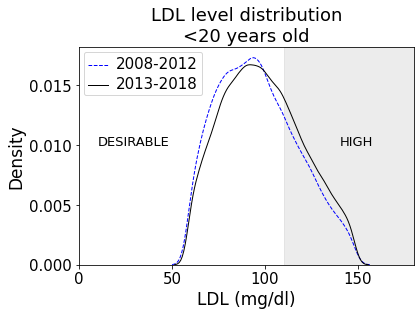

,SUBSET,df1(%),n1,df2(%),n2,Diff(%),p value
0,<20 years old,26.47,24085,31.10,59901,4.64,8.053125e-64


In [ ]:
prob = pd.DataFrame()
subset = []
df_1 = []
df_2 = []
dif = []
mw = []

df1 = pd.Series(df1['Result'])
df2 = pd.Series(df2['Result'])

#mann-whitney u
b = scipy.stats.mannwhitneyu(df1,df2,alternative='two-sided')[1]
#probability density plot
ax1 = sns.distplot(df1,hist=False,kde=True,kde_kws = {'linewidth': 1}, label = '2008-2012',color='blue')
x1 = ax1.get_lines()[0].get_data()[0] # Get the x data of the distribution
y1 = ax1.get_lines()[0].get_data()[1] # Get the y data of the distribution
[line.set_linestyle("--") for line in ax1.lines]
ax2 = sns.distplot(df2,hist=False,kde=True,kde_kws = {'linewidth': 1}, label = '2013-2018',color='black')
x2 = ax2.get_lines()[1].get_data()[0] # Get the x data of the distribution
y2 = ax2.get_lines()[1].get_data()[1] # Get the y data of the distribution

'''
Code for the probability calculation adapted from: https://stackoverflow.com/questions/52470172/how-to-get-possibility-distribution-function-from-python-seaborn-displot
'''
#ldl level probability calculation 
#ref value 
value = ref1
#Value to estimate for
value2 = 200 #x lim

ecart = value2 - value
idx1 = (np.abs(x1-value)).argmin()
idx_1 = (np.abs(x1-(value+ecart))).argmin()

idx2 = (np.abs(x2-value)).argmin()
idx_2 = (np.abs(x2-(value+ecart))).argmin()
  
import scipy
cdf1 = scipy.integrate.cumtrapz(y1, x1, dx=1, initial=0)
pr1 = cdf1[idx_1] - cdf1[idx1] 

cdf2 = scipy.integrate.cumtrapz(y2, x2, dx=1, initial=0)
pr2 = cdf2[idx_2] - cdf2[idx2] 

plt.xlim(0,180)
plt.xlabel('LDL (mg/dl)',fontsize=17)
plt.ylabel('Density',fontsize = 17)
plt.title('LDL level distribution\n<20 years old',fontsize=18)
plt.text(ref1-100,0.010,'DESIRABLE',fontsize = 13) # text
plt.text(ref1+30,0.010,'HIGH',fontsize = 13)
ax1.tick_params(labelsize=15)
plt.setp(ax1.get_legend().get_texts(), fontsize='15')
plt.axvspan(xmin=(value+0.1), xmax=200,alpha = 0.15,color ='gray')

subset.append('<20 years old')
df_1.append("{:.2f}".format(pr1*100))
df_2.append("{:.2f}".format(pr2*100))
dif.append(round((pr2-pr1)*100,2))
mw.append(b)

prob['SUBSET'] = subset
prob['df1(%)'] = df_1
prob['n1'] = len(df1)
prob['df2(%)'] = df_2
prob['n2'] = len(df2)
prob['Diff(%)'] = dif
prob['p value'] = mw

plt.show()
prob

**Conclusion** These two distribution is really different of each other and there is 4.64% more people under 20 years old, for the recent years, with ldl levels above reference level than the previous years.

## **Check ldl cholesterol levels per age group**

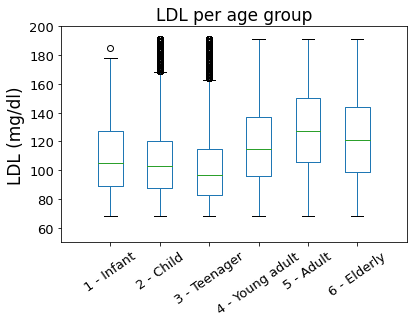

In [ ]:
#@title By Age Group
#-------------------------------------------------------------------#
#                Boxplot of results per age group                   #
#-------------------------------------------------------------------#
#remove extreme data (below 5% and above 95%)
df_clean2 = df_clean[(df_clean['Result']<=df_clean['Result'].quantile(.95))&(df_clean['Result']>=df_clean['Result'].quantile(.05))]

ax = df_clean2.boxplot(by='Age group',column=['Result'],rot=45,grid=False)
plt.xlim(0, 7)
plt.ylim(50, 200)
plt.title("LDL per age group",fontsize = 17)
plt.suptitle("")
plt.xlabel('')
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13,rotation = 35)
ax.set_ylabel("LDL (mg/dl)",fontsize = 17)
plt.show()

**Conclusion:** For age group we observe Elderly and Adults with higher levels of ldl cholesterol.